## Extracting data from Google trends

In [1]:
from pytrends.request import TrendReq

# Create a pytrends object to request data from Google trends

pytrends = TrendReq(hl="en-US")

# Specify keyowrds to extract data

keywords = ["Python", "Rust", "Java", "C++", "JavaScript"]
pytrends.build_payload(keywords, timeframe="today 5-y")

# Specify and get data
data = pytrends.interest_over_time()
data

c:\Users\USER\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,Python,Rust,Java,C++,JavaScript,isPartial
date,,,,,,
2019-09-29,25,4,23,83,10,False
2019-10-06,26,4,24,74,10,False
2019-10-13,26,4,25,77,10,False
2019-10-20,26,4,23,77,10,False
2019-10-27,25,4,22,74,9,False
...,...,...,...,...,...,...
2024-09-01,28,7,18,92,7,False
2024-09-08,29,6,19,89,6,False
2024-09-15,28,6,18,90,6,False


## Visualizing the DataFrame with Matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

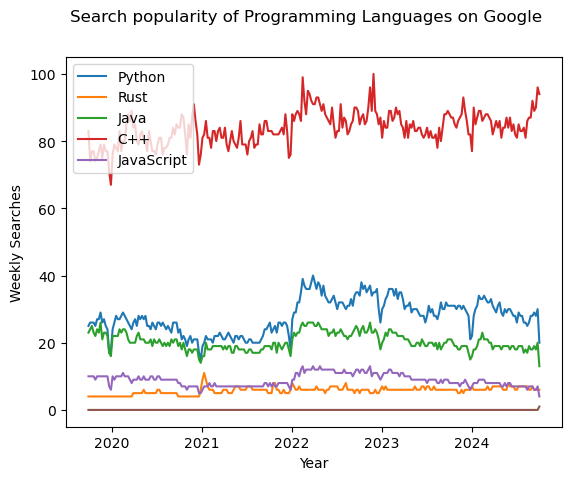

In [19]:
# Plotting the data using a legend
plt.plot(data)

# Making graph informative using labels
plt.suptitle("Search popularity of Programming Languages on Google")
plt.xlabel("Year")
plt.ylabel("Weekly Searches")

plt.legend(keywords, loc="upper left")
plt.savefig("search_trend.png")

## Diving deeper into each programming language

#### Comparing with python

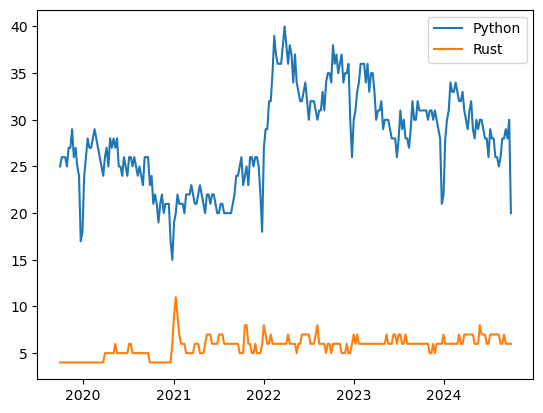

In [7]:
# Comparing Python and Rust
pyrust = ["Python", "Rust"]
plt.plot(data[pyrust])
plt.legend(pyrust)

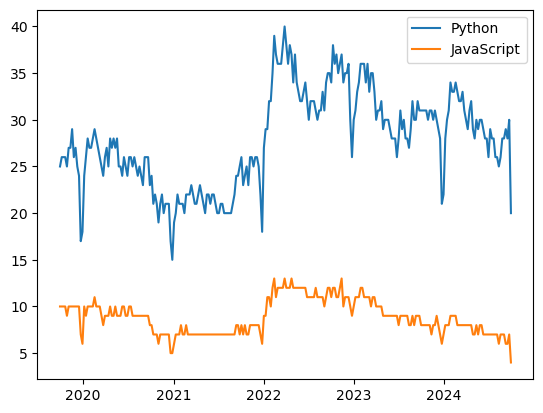

In [9]:
# Comparing Python and JavaScript
pyjs = ["Python", "JavaScript"]
plt.plot(data[pyjs])
plt.legend(pyjs)

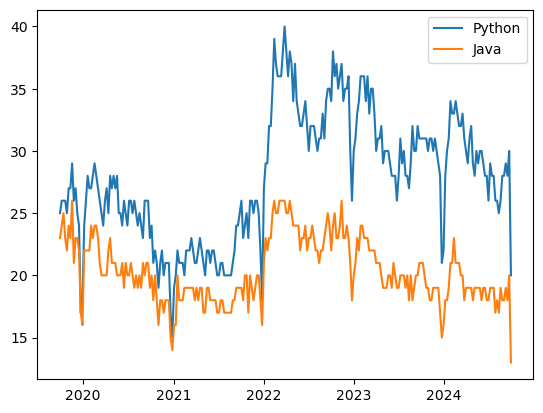

In [10]:
# Comparing Python and Java
pyjava = ["Python", "Java"]
plt.plot(data[pyjava])
plt.legend(pyjava)

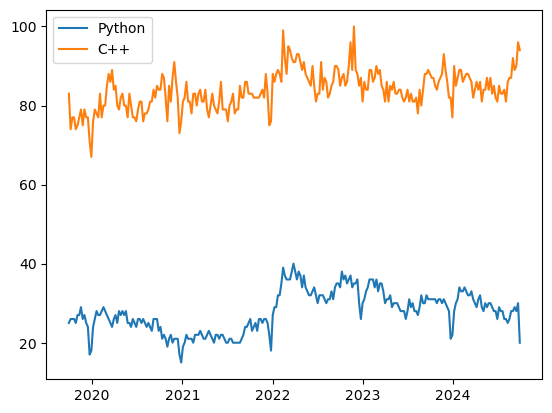

In [11]:
# Comparing Python and C++
pycpp = ["Python", "C++"]
plt.plot(data[pycpp])
plt.legend(pycpp)

## Identifying language popularity by Country

In [12]:
# Extracting country level data
data2 = pytrends.interest_by_region(resolution="COUNTRY", inc_low_vol=True)
data2

,Python,Rust,Java,C++,JavaScript
geoName,,,,,
Afghanistan,17,1,18,55,9
Albania,8,1,29,54,8
Algeria,15,1,11,69,4
American Samoa,6,7,8,78,1
Andorra,18,4,13,57,8
...,...,...,...,...,...
Western Sahara,21,1,12,59,7
Yemen,23,1,17,50,9
Zambia,6,1,16,75,2


#### Visualizing the top 10 Countries intrested in Python

In [21]:
# defining a function for reusability
def country_intrest(language):
    top_region_search = data2[language].nlargest(10)
    top_region_search = top_region_search.to_frame()
    top_region_search.plot(kind="bar")
    plt.suptitle(f"{language} Searches per Country")
    plt.xlabel("Countries")
    plt.ylabel("Average No. of Searches over Five Years")
    plt.show()



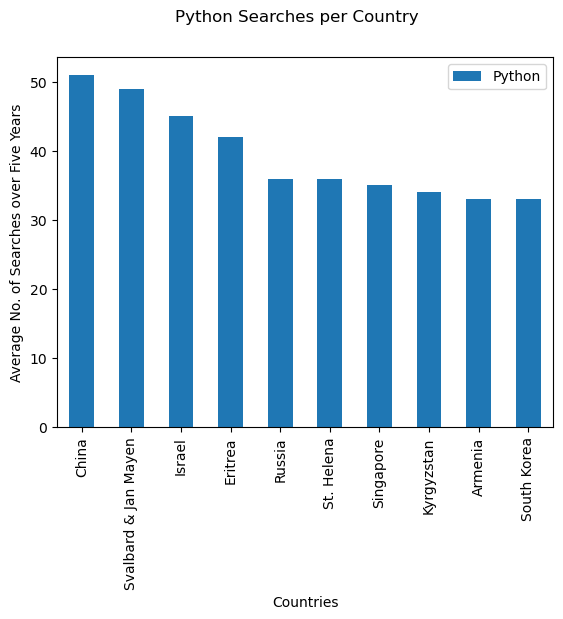

In [22]:
country_intrest("Python")

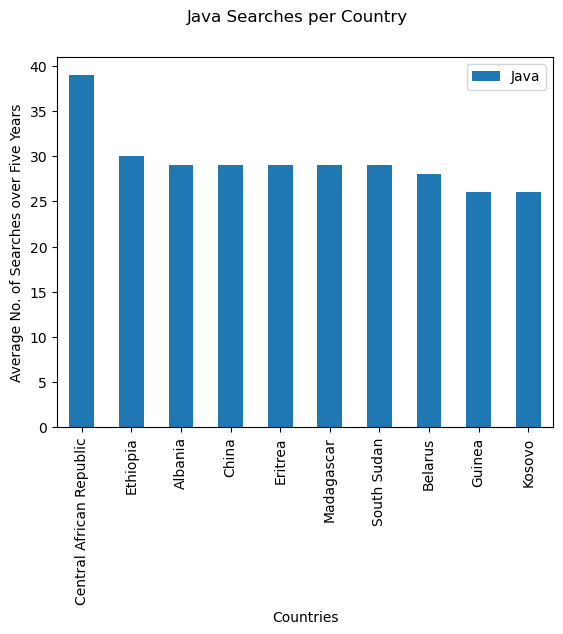

In [23]:
country_intrest("Java")

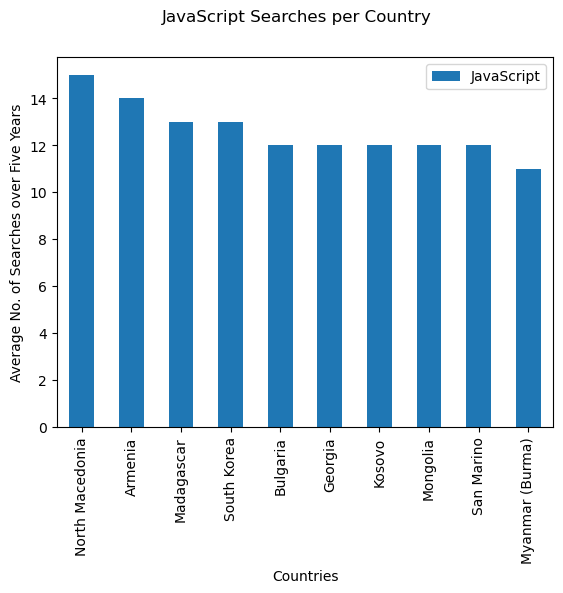

In [24]:
country_intrest("JavaScript")

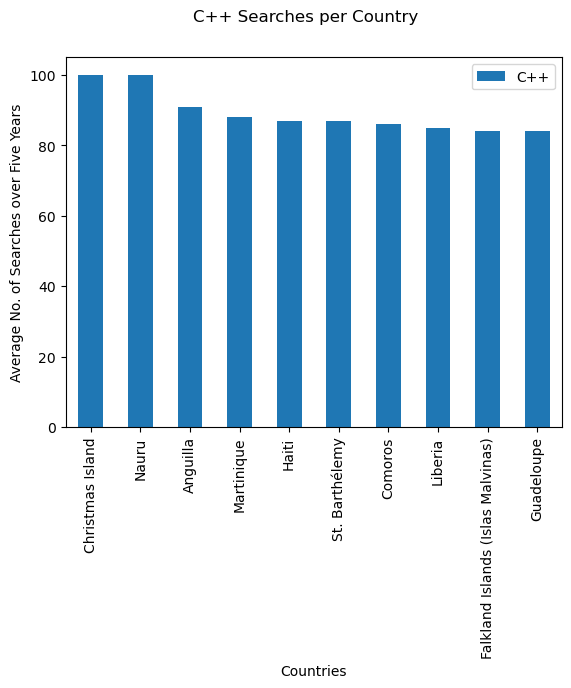

In [25]:
country_intrest("C++")

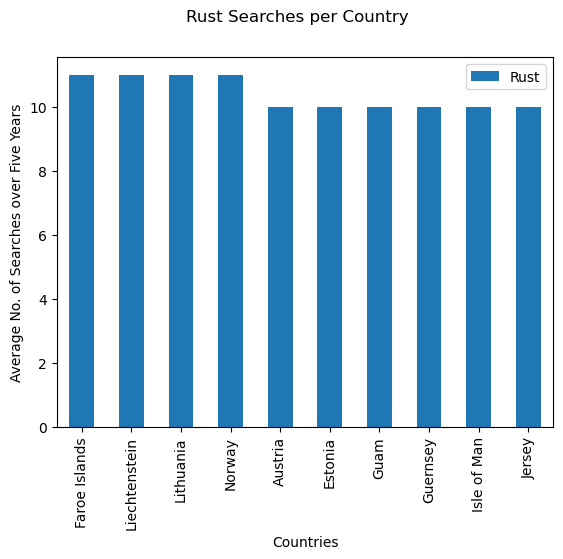

In [26]:
country_intrest("Rust")

#### Visualizing the programming language searches of the most populated countries in each continent

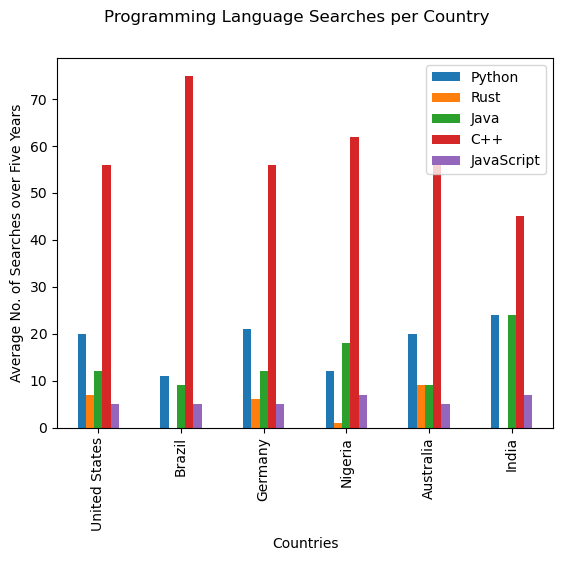

In [36]:
data2.loc[["United States", "Brazil", "Germany", "Nigeria", "Australia", "India"]].plot(kind="bar")

plt.suptitle(f"Programming Language Searches per Country")
plt.xlabel("Countries")
plt.ylabel("Average No. of Searches over Five Years")
plt.show()

In [37]:
# Converting to CSV for refrence
data.to_csv("prog_languages.csv")
data2.to_csv("prog_lang_region.csv")